In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import os

In [3]:
data = pd.read_csv('data\Airlines.csv')
data

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [27]:
str_code = data.AirportFrom.unique()
all(len(s) == 3 for s in str_code)

True

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [5]:
data.isna().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

### Exclude ID column
### Columns rename

In [6]:
df = data.copy()
df.drop(['id'], axis=1, inplace=True)
df.columns = df.columns.str.lower()

### Tranasform the numerical that are categorical
### Select categorical and numerical columns

In [7]:
df['flight'] = df['flight'].astype('str')
df['dayofweek'] = df['dayofweek'].astype('str')

In [8]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).columns

cat_cols, num_cols

(Index(['airline', 'flight', 'airportfrom', 'airportto', 'dayofweek'], dtype='object'),
 Index(['time', 'length', 'delay'], dtype='object'))

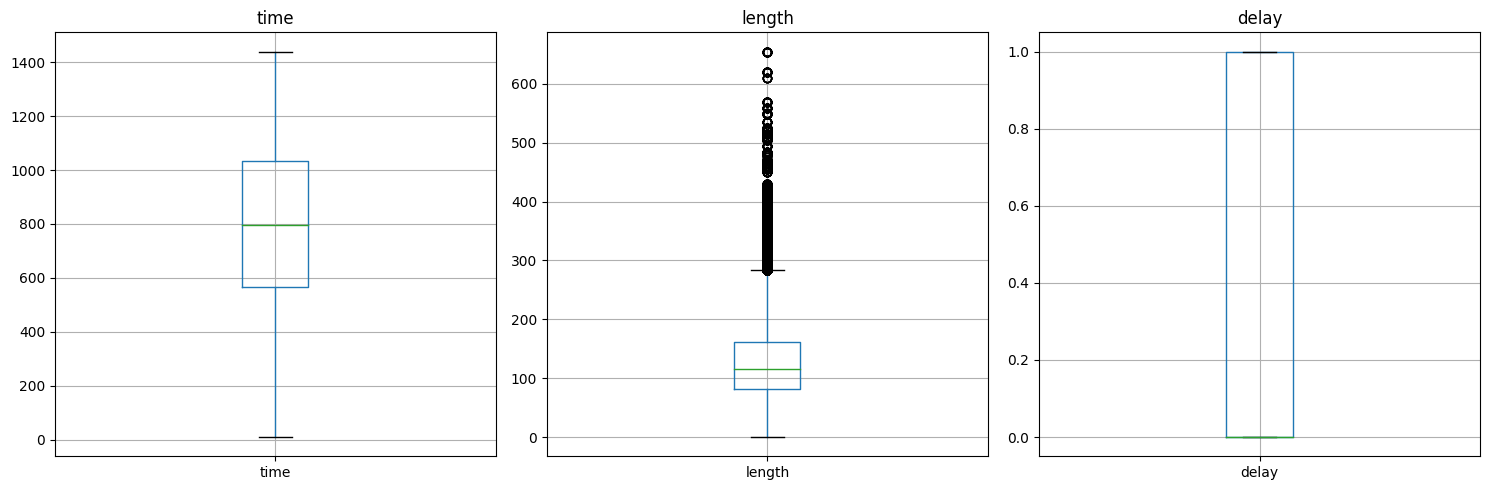

In [9]:
num_cols_count = len(num_cols)
fig, axes = plt.subplots(1, num_cols_count, figsize=(15, 5))  # Create subplots

# Iterate through numerical columns and create box plots in subplots
for i, column in enumerate(num_cols):
    df.boxplot(column=column, vert=True, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [10]:
# fig = px.box(df, y=num_cols, facet_col=None)

# # Customize the layout of the figure
# fig.update_layout(
#     title="Box Plots of Numerical Columns",
#     xaxis_title="Features",
#     yaxis_title="Values",
#     margin=dict(l=10, r=10, t=30, b=10),
#     width=1000,
#     height=500,
# )

# # Show the plot
# fig.show()

### Distribution of delay over numerical features

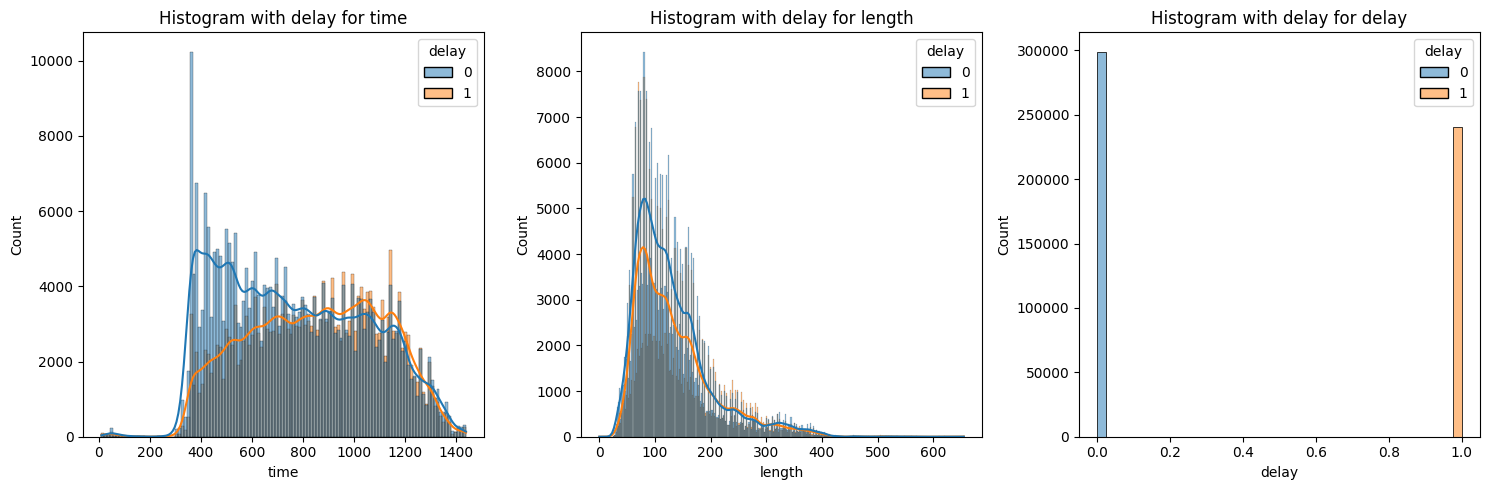

In [11]:
num_cols_count = len(num_cols)
fig, axes = plt.subplots(1, num_cols_count, figsize=(15, 5))  # Create subplots

# Iterate through numerical columns and create box plots in subplots
for i, column in enumerate(num_cols):
    ax = axes[i]
    sns.histplot(data=df, x=column, hue='delay', kde=True, ax=ax)
    ax.set_title(f'Histogram with delay for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

### Distribution of delay over CAT features

<Axes: xlabel='airline', ylabel='count'>

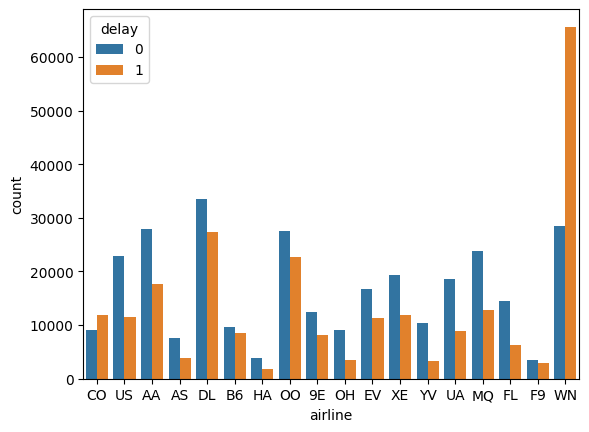

In [12]:
sns.countplot(data=df, x='airline', hue='delay')

<Axes: xlabel='dayofweek', ylabel='count'>

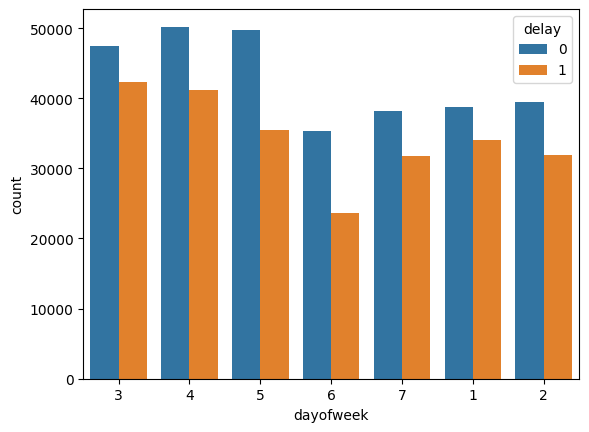

In [13]:
sns.countplot(data=df, x='dayofweek', hue='delay')

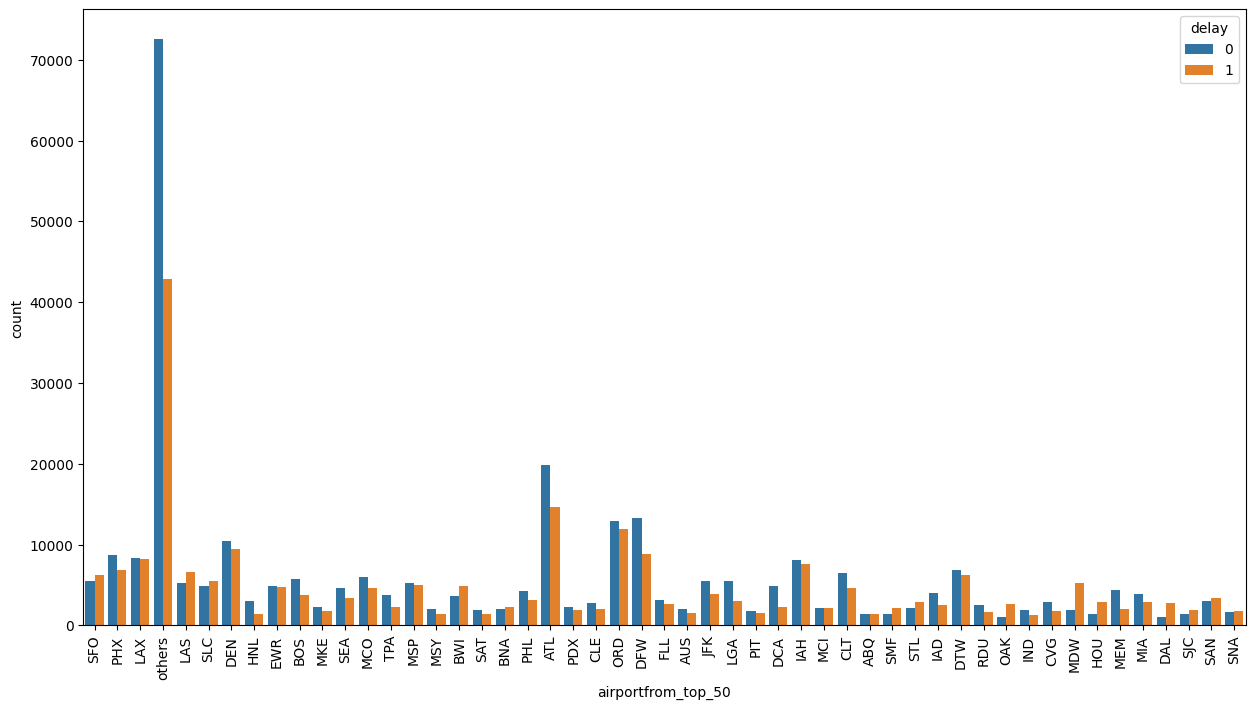

In [14]:
# Masking the lower important airports FROM
airfrom = df['airportfrom'].value_counts()
df['airportfrom_top_50'] = df['airportfrom'].apply(lambda s: s if s in airfrom[:50] else 'others')

fig = plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='airportfrom_top_50', hue='delay')
plt.xticks(rotation=90)
plt.show()



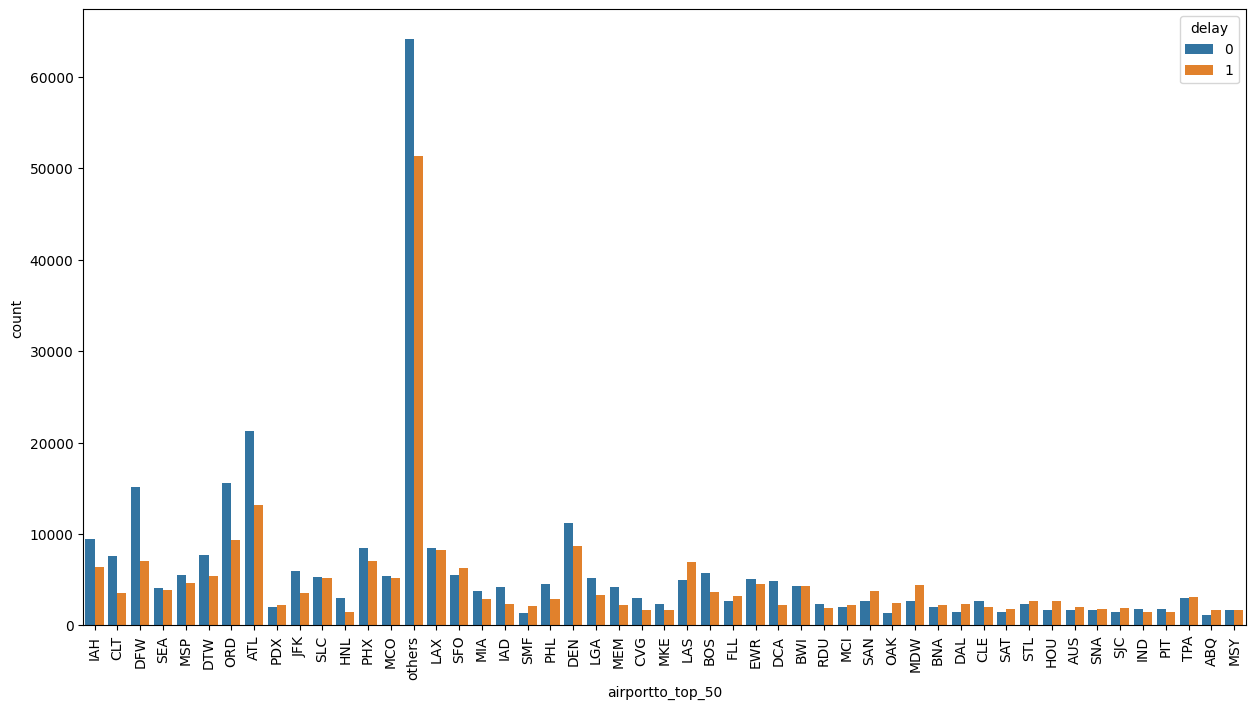

In [15]:
# Masking the lower important airports TO
airfrom = df['airportto'].value_counts()
df['airportto_top_50'] = df['airportto'].apply(lambda s: s if s in airfrom[:50] else 'others')

fig = plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='airportto_top_50', hue='delay')
plt.xticks(rotation=90)
plt.show()


### TOP Delay airports

In [16]:
df[df.delay == 1].groupby('airportto_top_50')['delay'].count().sort_values(ascending=False)[:5]

airportto_top_50
others    51310
ATL       13217
ORD        9295
DEN        8656
LAX        8199
Name: delay, dtype: int64

In [17]:
df[df['delay']== 1].groupby('airportfrom_top_50')['delay']\
    .count()\
    .sort_values(ascending=False)[:6]

airportfrom_top_50
others    42885
ATL       14601
ORD       11906
DEN        9433
DFW        8809
LAX        8270
Name: delay, dtype: int64